# <center> Jupyter Notebooks in Action </center>

# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Standard-capabilities" data-toc-modified-id="Standard-capabilities-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Standard capabilities</a></div><div class="lev2 toc-item"><a href="#Fancy-stuff" data-toc-modified-id="Fancy-stuff-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Fancy stuff</a></div><div class="lev3 toc-item"><a href="#Presentations" data-toc-modified-id="Presentations-021"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>Presentations</a></div><div class="lev2 toc-item"><a href="#Reading-from-other-Jupyter-notebooks" data-toc-modified-id="Reading-from-other-Jupyter-notebooks-03"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Reading from other Jupyter notebooks</a></div><div class="lev2 toc-item"><a href="#Converting-to-other-formats" data-toc-modified-id="Converting-to-other-formats-04"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>Converting to other formats</a></div><div class="lev2 toc-item"><a href="#Adding-other-content" data-toc-modified-id="Adding-other-content-05"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>Adding other content</a></div>

## Standard capabilities

### Plotting

* Supports standard plotting capabilities of Python
* Supports different backends such as the interactive nbagb backend

In [2]:
import matplotlib.pyplot as plt
%matplotlib nbagg

<IPython.core.display.Javascript object>


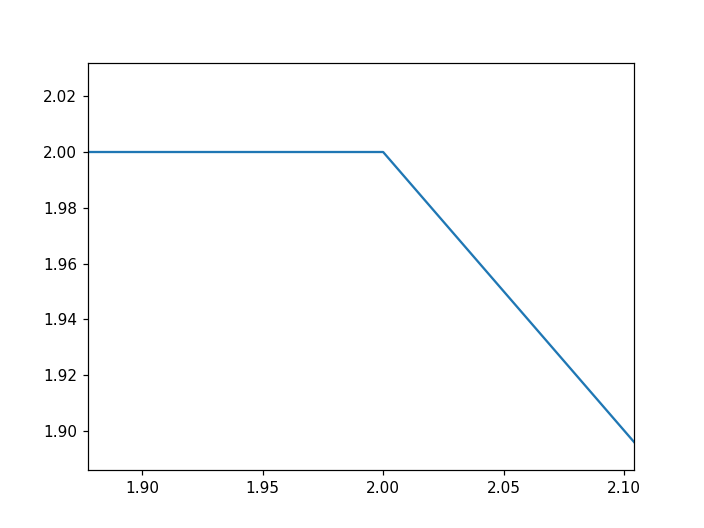

In [3]:
plt.plot([1,2,3],[2,2,1])

## Fancy stuff

### Presentations

* https://damianavila.github.io/RISE/
* https://github.com/Anaconda-Platform/nbpresent#install

Test meei 

## Reading from other Jupyter notebooks

In [17]:
import json

In [36]:
f1 = open('DependA.ipynb')
lines=f1.readlines()
f1.close()

str_dum = ''
for l in lines:
    str_dum +=l

In [38]:
d = json.loads(str_dum)

In [39]:
d['cells']

[{u'cell_type': u'code',
  u'execution_count': 5,
  u'metadata': {},
  u'outputs': [],
  u'source': [u'time = 3. #s\n', u'distance = 5. #m']},
 {u'cell_type': u'code',
  u'execution_count': 6,
  u'metadata': {},
  u'outputs': [{u'data': {u'text/plain': [u'1.6666666666666667']},
    u'execution_count': 6,
    u'metadata': {},
    u'output_type': u'execute_result'}],
  u'source': [u'velocity = distance/time #m/s\n', u'velocity']},
 {u'cell_type': u'code',
  u'execution_count': None,
  u'metadata': {},
  u'outputs': [],
  u'source': []}]

In [51]:
for cell in d['cells']:
    if len(cell['source'])>0:
        if 'velocity' in cell['source'][-1]:
            print(cell['outputs'][0]['data']['text/plain'])

[u'1.6666666666666667']


## Converting to other formats

In [60]:
%%bash
jupyter nbconvert CapabilityDemos.ipynb --to python  #--to pdf

[NbConvertApp] Converting notebook CapabilityDemos.ipynb to python
[NbConvertApp] Writing 663 bytes to CapabilityDemos.py


In [62]:
!ls

CapabilityDemos.ipynb DependA.ipynb
CapabilityDemos.py    Jupyter_prep.md


## Adding other content